In [3]:
import nbimporter
import importlib
from utils.imports import *
from utils.import_data import *
from utils.preprocessing import *
from utils.evaluation import *
from utils.visualizations import *  
from models.rf_model import *
import pandas as pd

In [4]:
from models.rf_model import train_random_forest
from utils.visualizations import plot_forecast
from models.xgb_model import train_xgb_model
from models.lstm_model import train_lstm_model
from models.lstm_model import build_lstm_model
from models.lstm_model import perform_simplified_grid_search
from utils.visualizations import plot_lstm_results
from models.sequential_model import train_sequential_model
from utils.visualizations import plot_sequential_results


===== Starting Sequential LSTM model training =====
MAIN FUNCTION ERROR in Sequential model section: name 'X_train_scaled' is not defined
===== Sequential LSTM model section completed =====



Traceback (most recent call last):
  File "C:\Users\juanp\AppData\Local\Temp\ipykernel_14524\338962866.py", line 116, in <module>
    X_train_scaled, y_train_scaled,
    ^^^^^^^^^^^^^^
NameError: name 'X_train_scaled' is not defined


                             Open   High    Low  Close    Volume  GreenDay
Date                                                                      
2021-12-13 00:00:00-05:00  11.100  11.29  10.31  10.81  19658400         0
2021-12-14 00:00:00-05:00  10.550  10.58   9.27   9.92  22728100         0
2021-12-15 00:00:00-05:00   9.630  10.29   9.42  10.01  12663900         1
2021-12-16 00:00:00-05:00  10.450  10.49   9.56  10.00  13981300         0
2021-12-17 00:00:00-05:00   9.925  10.17   9.14   9.80  21560800         0
Data loaded successfully. Shape: (716, 6)
Feature engineering completed. Shape: (216, 86)
Data split completed. Training data shape: (172, 85)
Data scaling completed.
Training Random Forest model...
Model trained with parameters:
  - n_estimators: 100
  - max_depth: None
  - min_samples_split: 2
  - min_samples_leaf: 1
  - max_features: log2


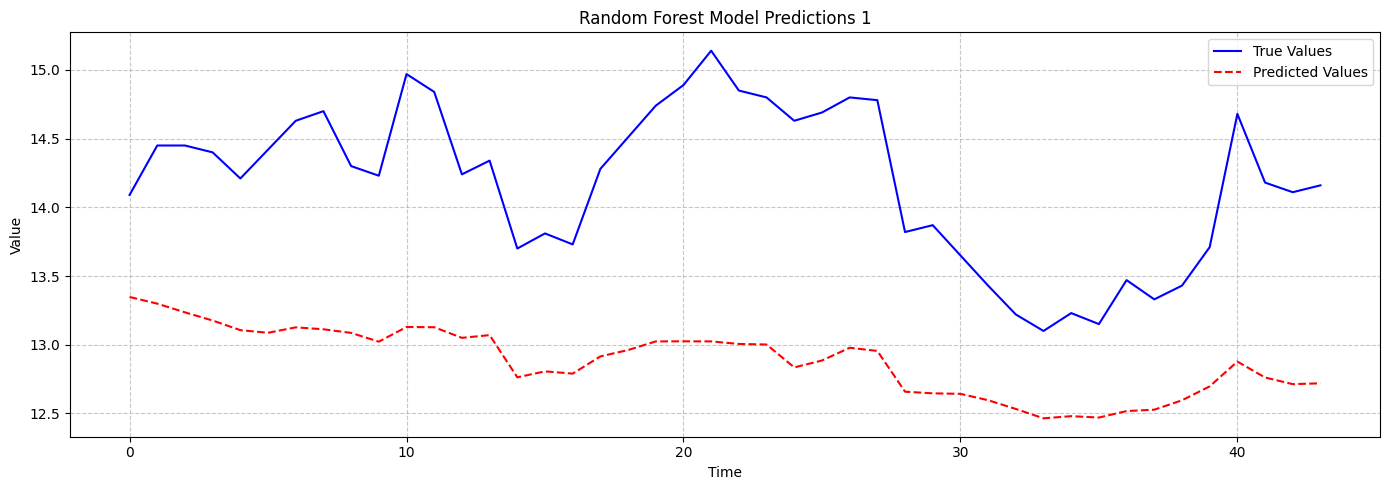

KeyboardInterrupt: 

In [6]:
def main():
    # Load data
    data = load_data()
    print("Data loaded successfully. Shape:", data.shape)
    
    # Feature engineering (pass the entire DataFrame, not just the Close values)
    processed_data = feature_engineering(data)
    print("Feature engineering completed. Shape:", processed_data.shape)
    
    # Split data (note: using train_size not test_size)
    X_train, X_test, y_train, y_test = split_data(processed_data, train_size=0.8)
    print("Data split completed. Training data shape:", X_train.shape)
    
    # Scale data
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, feature_scaler, target_scaler = scale_data(
        X_train, X_test, 
        y_train.values.reshape(-1, 1), 
        y_test.values.reshape(-1, 1)
    )
    print("Data scaling completed.")
    
    # Fin de la preparacion de los datos


    # Comienzo Random Forest Model
    print("Training Random Forest model...")
    rf_model = train_random_forest(X_train_scaled, y_train_scaled)
    
    # Evaluate Random Forest model
    y_pred_scaled = rf_model.predict(X_test_scaled)
    y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test_original = target_scaler.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

    # Save model

    save_model(rf_model, "rf_model.pkl")

    # Evaluate the model

    plot_predictions(y_test_original, y_pred, title="Random Forest Model Predictions 1")


    # Trabajando con los parametros
    param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt']
}

    optimized_rf, best_params = optimize_hyperparameters(X_train_scaled, y_train_scaled, param_grid)
    opt_y_pred_scaled = optimized_rf.predict(X_test_scaled)
    opt_y_pred = target_scaler.inverse_transform(opt_y_pred_scaled.reshape(-1, 1)).flatten()

    # visualizar nuevo random 
    plot_predictions(y_test_original, opt_y_pred, title="Random Forest Model Predictions 2")


    # Random Forest Model con los parametros optimizados

    print("Training Random Forest model with optimized hyperparameters...")

    rf_model_optimized = train_random_forest(X_train_scaled, y_train_scaled, n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)


    save_model(rf_model_optimized, "rf_model_optimized.pkl")
    # Finalizado random forest


    # Modelo XPGB
    print("Training XGBoost model...")

    # Aunque el modelo ranfom forest no entrego buenos resultados 
    # al hacer un grid de los parametros si se observo una mejora por lo que se va a continuar con esto para el siguiente modelo

    xgb_model = train_xgb_model(X_train_scaled, y_train_scaled)
    # Evaluate XGBoost model
    xgb_y_pred_scaled = xgb_model.predict(X_test_scaled)
    xgb_y_pred = target_scaler.inverse_transform(xgb_y_pred_scaled.reshape(-1, 1)).flatten()


    plot_predictions(y_test_original, xgb_y_pred, title="XGBoost Model Predictions")

    save_model(xgb_model, "xgb_model.pkl")

    
    # F, no buenos resultados
    # Fin de XGB

    # Comienzo de Modelo LSTM

    # Prepare data for LSTM model

   # Train LSTM model
    print("\nTraining LSTM model...")
    lstm_model, history, X_test_seq, y_test_seq, best_params = train_lstm_model(
        X_train_scaled, y_train_scaled, 
        X_test_scaled, y_test_scaled,
        time_steps=20
    )
    
    # Plot results
    print("\nPlotting LSTM model results...")
    plot_lstm_results(y_test_original, y_pred, history)


    # Fin de LSTM

    # Comienzo Modelo Sequential
# In your main function
print("\n===== Starting Sequential LSTM model training =====")
try:
    # Reduce time_steps to 20 to ensure we have enough data
    seq_model, seq_history, seq_X_test, seq_y_test, seq_best_params = train_sequential_model(
        X_train_scaled, y_train_scaled,
        X_test_scaled, y_test_scaled,
        time_steps=20  # Reduced from 60 to 20
    )    

    print("After function call - checking return values...")
    
    # Check if we have valid return values
    if seq_model is None:
        print("Error: Sequential model is None - training failed")
    elif seq_X_test is None:
        print("Error: seq_X_test is None - training failed")
    else:
        print("Return values look good, proceeding to predictions")
        
        # Make predictions
        print(f"Prediction input shape: {seq_X_test.shape}")
        
        # Make sure we're not trying to predict on empty data
        if seq_X_test.size == 0:
            print("Error: Empty test sequence data. Check time_steps parameter.")
        else:
            print("Making predictions...")
            seq_y_pred_scaled = seq_model.predict(seq_X_test)
            print(f"Prediction output shape: {seq_y_pred_scaled.shape}")
            
            # Make sure the prediction output is in the right shape for inverse_transform
            print("Transforming predictions back to original scale...")
            if len(seq_y_pred_scaled.shape) == 2:
                seq_y_pred = target_scaler.inverse_transform(seq_y_pred_scaled).flatten()
            else:
                seq_y_pred = target_scaler.inverse_transform(seq_y_pred_scaled.reshape(-1, 1)).flatten()
            print(f"Final prediction shape: {seq_y_pred.shape}")
            
            # Get original values for the corresponding test set
            seq_y_test_original = target_scaler.inverse_transform(seq_y_test.reshape(-1, 1)).flatten()
            
            # Plot results
            print("\nPlotting Sequential LSTM model results...")
            plot_sequential_results(seq_y_test_original, seq_y_pred, seq_history)
            print("Sequential model plotting complete")
except Exception as e:
    print(f"MAIN FUNCTION ERROR in Sequential model section: {e}")
    import traceback
    traceback.print_exc()

print("===== Sequential LSTM model section completed =====\n")

    # Fin del modelo Sequential


# Entry point
if __name__ == "__main__":
    main()

# Se pueden ahorrar recursos si primero se verifica si hay un modelo guardado y usar ese
